# Welcome to Covid19 Data Analysis Notebook
------------------------------------------

### Let's Import the modules 

In [9]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
import types
from botocore.client import Config
import ibm_boto3
print('Modules are imported.')

Modules are imported.


## Task 2 

### Task 2.1: importing covid19 dataset
importing "Covid19_Confirmed_dataset.csv" from "./Dataset" folder. 


In [16]:

import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_d02431fcc2f0433d9300f82440148acf = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='g4kZRw-D_V8OPXNalaaL2UYNHfoS6x1P90yIqz1fYcR0',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_d02431fcc2f0433d9300f82440148acf.get_object(Bucket='covid19-donotdelete-pr-0ejfiv08u9wgki',Key='time_series_covid19_confirmed_global.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

corona_dataset_csv = pd.read_csv(body)
corona_dataset_csv.head()


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/29/20,5/30/20,5/31/20,6/1/20,6/2/20,6/3/20,6/4/20,6/5/20,6/6/20,6/7/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,13659,14525,15205,15750,16509,17267,18054,18969,19551,20342
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,1099,1122,1137,1143,1164,1184,1197,1212,1232,1246
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,9134,9267,9394,9513,9626,9733,9831,9935,10050,10154
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,764,764,764,765,844,851,852,852,852,852
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,81,84,86,86,86,86,86,86,88,91


In [17]:
corona_dataset_csv.shape

(266, 142)

### Task 2.2: Delete the useless columns

In [18]:
corona_dataset_csv.drop(["Lat","Long"],axis=1,inplace=True)

In [19]:
corona_dataset_csv.head(10)

,Province/State,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,5/29/20,5/30/20,5/31/20,6/1/20,6/2/20,6/3/20,6/4/20,6/5/20,6/6/20,6/7/20
0,NaN,Afghanistan,0,0,0,0,0,0,0,0,...,13659,14525,15205,15750,16509,17267,18054,18969,19551,20342
1,NaN,Albania,0,0,0,0,0,0,0,0,...,1099,1122,1137,1143,1164,1184,1197,1212,1232,1246
2,NaN,Algeria,0,0,0,0,0,0,0,0,...,9134,9267,9394,9513,9626,9733,9831,9935,10050,10154
3,NaN,Andorra,0,0,0,0,0,0,0,0,...,764,764,764,765,844,851,852,852,852,852
4,NaN,Angola,0,0,0,0,0,0,0,0,...,81,84,86,86,86,86,86,86,88,91
5,NaN,Antigua and Barbuda,0,0,0,0,0,0,0,0,...,25,25,26,26,26,26,26,26,26,26
6,NaN,Argentina,0,0,0,0,0,0,0,0,...,15419,16214,16851,17415,18319,19268,20197,21037,22020,22794
7,NaN,Armenia,0,0,0,0,0,0,0,0,...,8676,8927,9282,9492,10009,10524,11221,11817,12364,13130
8,Australian Capital Territory,Australia,0,0,0,0,0,0,0,0,...,107,107,107,107,107,107,107,107,108,108
9,New South Wales,Australia,0,0,0,0,3,4,4,4,...,3092,3095,3098,3104,3104,3106,3110,3110,3109,3112


### Task 2.3: Aggregating the rows by the country

In [20]:
corona_dataset_aggregated = corona_dataset_csv.groupby("Country/Region").sum()

In [21]:
corona_dataset_aggregated.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,5/29/20,5/30/20,5/31/20,6/1/20,6/2/20,6/3/20,6/4/20,6/5/20,6/6/20,6/7/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,13659,14525,15205,15750,16509,17267,18054,18969,19551,20342
Albania,0,0,0,0,0,0,0,0,0,0,...,1099,1122,1137,1143,1164,1184,1197,1212,1232,1246
Algeria,0,0,0,0,0,0,0,0,0,0,...,9134,9267,9394,9513,9626,9733,9831,9935,10050,10154
Andorra,0,0,0,0,0,0,0,0,0,0,...,764,764,764,765,844,851,852,852,852,852
Angola,0,0,0,0,0,0,0,0,0,0,...,81,84,86,86,86,86,86,86,88,91


In [22]:
corona_dataset_aggregated.shape

(188, 138)

### Task 2.4: Visualizing data related to a country for example China
visualization always helps for better understanding of our data.

In [23]:
corona_dataset_aggregated.loc["Venezuela"]

1/22/20       0
1/23/20       0
1/24/20       0
1/25/20       0
1/26/20       0
1/27/20       0
1/28/20       0
1/29/20       0
1/30/20       0
1/31/20       0
2/1/20        0
2/2/20        0
2/3/20        0
2/4/20        0
2/5/20        0
2/6/20        0
2/7/20        0
2/8/20        0
2/9/20        0
2/10/20       0
2/11/20       0
2/12/20       0
2/13/20       0
2/14/20       0
2/15/20       0
2/16/20       0
2/17/20       0
2/18/20       0
2/19/20       0
2/20/20       0
           ... 
5/9/20      402
5/10/20     414
5/11/20     422
5/12/20     423
5/13/20     423
5/14/20     455
5/15/20     459
5/16/20     504
5/17/20     541
5/18/20     618
5/19/20     749
5/20/20     824
5/21/20     882
5/22/20     944
5/23/20    1010
5/24/20    1121
5/25/20    1177
5/26/20    1211
5/27/20    1245
5/28/20    1325
5/29/20    1370
5/30/20    1459
5/31/20    1510
6/1/20     1662
6/2/20     1819
6/3/20     1952
6/4/20     2087
6/5/20     2145
6/6/20     2316
6/7/20     2377
Name: Venezuela, Length:

### Task3: Calculating a good measure 
we need to find a good measure reperestend as a number, describing the spread of the virus in a country. 

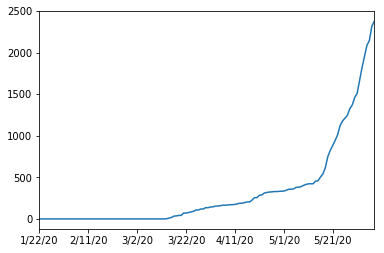

In [24]:
corona_dataset_aggregated.loc['Venezuela'].plot()


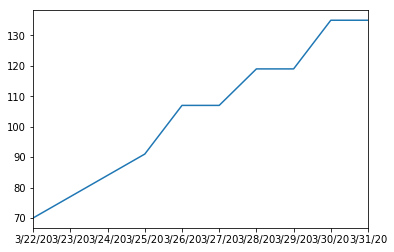

In [25]:
# select data in a specfic period
corona_dataset_aggregated.loc["Venezuela"][60:70].plot()

### task 3.1: caculating the first derivative of the curve

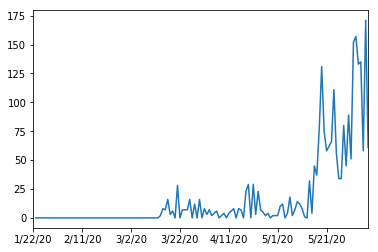

In [26]:
#maximum number of new infection rates 
corona_dataset_aggregated.loc["Venezuela"].diff().plot()

### task 3.2: find maxmimum infection rate for Venezuela

In [27]:
#maximum in one day
corona_dataset_aggregated.loc['Venezuela'].diff().max()

171.0

In [28]:
corona_dataset_aggregated.loc["Italy"].diff().max()

6557.0

In [29]:
corona_dataset_aggregated.loc["Spain"].diff().max()

9630.0

### Task 3.3: find maximum infection rate for all of the countries. 

In [30]:
countries = list(corona_dataset_aggregated.index)
max_infection_rates = []
for c in countries :
    max_infection_rates.append(corona_dataset_aggregated.loc[c].diff().max())
#append the maximun infection rate to the original dataset
corona_dataset_aggregated["max_infection_rate"] = max_infection_rates

In [31]:
corona_dataset_aggregated.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,5/30/20,5/31/20,6/1/20,6/2/20,6/3/20,6/4/20,6/5/20,6/6/20,6/7/20,max_infection_rate
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,14525,15205,15750,16509,17267,18054,18969,19551,20342,915.0
Albania,0,0,0,0,0,0,0,0,0,0,...,1122,1137,1143,1164,1184,1197,1212,1232,1246,34.0
Algeria,0,0,0,0,0,0,0,0,0,0,...,9267,9394,9513,9626,9733,9831,9935,10050,10154,199.0
Andorra,0,0,0,0,0,0,0,0,0,0,...,764,764,765,844,851,852,852,852,852,79.0
Angola,0,0,0,0,0,0,0,0,0,0,...,84,86,86,86,86,86,86,88,91,8.0


### Task 3.4: create a new dataframe with only needed column 

In [32]:
corona_data = pd.DataFrame(corona_dataset_aggregated["max_infection_rate"])

### Task4: 
- Importing the WorldHappinessReport.csv dataset
- selecting needed columns for our analysis 
- join the datasets 
- calculate the correlations as the result of our analysis

### Task 4.1 : importing the dataset

In [34]:

body = client_d02431fcc2f0433d9300f82440148acf.get_object(Bucket='covid19-donotdelete-pr-0ejfiv08u9wgki',Key='worldwide_happiness_report.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

happines_report_csv = pd.read_csv(body)
happines_report_csv.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [35]:
happines_report_csv.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


### Task 4.2: let's drop the useless columns 

In [36]:
useless_cols = ["Overall rank","Score","Generosity","Perceptions of corruption"]

In [37]:
happines_report_csv.drop(useless_cols,axis=1,inplace=True)
happines_report_csv.head()

,Country or region,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
0,Finland,1.340,1.587,0.986,0.596
1,Denmark,1.383,1.573,0.996,0.592
2,Norway,1.488,1.582,1.028,0.603
3,Iceland,1.380,1.624,1.026,0.591
4,Netherlands,1.396,1.522,0.999,0.557


### Task 4.3: changing the indices of the dataframe

In [38]:
happines_report_csv.set_index("Country or region",inplace=True)

In [39]:
happines_report_csv.head()

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Country or region,,,,
Finland,1.340,1.587,0.986,0.596
Denmark,1.383,1.573,0.996,0.592
Norway,1.488,1.582,1.028,0.603
Iceland,1.380,1.624,1.026,0.591
Netherlands,1.396,1.522,0.999,0.557


### Task4.4: now let's join two dataset we have prepared  

#### Corona Dataset :

In [40]:
corona_data.head()

,max_infection_rate
Country/Region,
Afghanistan,915.0
Albania,34.0
Algeria,199.0
Andorra,79.0
Angola,8.0


In [41]:
corona_data.shape

(188, 1)

#### wolrd happiness report Dataset :

In [42]:
happines_report_csv.head()

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Country or region,,,,
Finland,1.340,1.587,0.986,0.596
Denmark,1.383,1.573,0.996,0.592
Norway,1.488,1.582,1.028,0.603
Iceland,1.380,1.624,1.026,0.591
Netherlands,1.396,1.522,0.999,0.557


In [43]:
happines_report_csv.shape

(156, 4)

In [44]:
data = corona_data.join(happines_report_csv,how="inner")
data.head()

,max_infection_rate,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Afghanistan,915.0,0.350,0.517,0.361,0.000
Albania,34.0,0.947,0.848,0.874,0.383
Algeria,199.0,1.002,1.160,0.785,0.086
Argentina,983.0,1.092,1.432,0.881,0.471
Armenia,766.0,0.850,1.055,0.815,0.283


### Task 4.5: correlation matrix 

In [45]:
data.corr()

,max_infection_rate,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
max_infection_rate,1.000000,0.207017,0.156629,0.216992,0.071337
GDP per capita,0.207017,1.000000,0.757521,0.859431,0.394799
Social support,0.156629,0.757521,1.000000,0.751632,0.456317
Healthy life expectancy,0.216992,0.859431,0.751632,1.000000,0.423146
Freedom to make life choices,0.071337,0.394799,0.456317,0.423146,1.000000


### Task 5: Visualization of the results
our Analysis is not finished unless we visualize the results in terms figures and graphs so that everyone can understand what you get out of our analysis

In [46]:
data.head()

,max_infection_rate,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Afghanistan,915.0,0.350,0.517,0.361,0.000
Albania,34.0,0.947,0.848,0.874,0.383
Algeria,199.0,1.002,1.160,0.785,0.086
Argentina,983.0,1.092,1.432,0.881,0.471
Armenia,766.0,0.850,1.055,0.815,0.283


### Task 5.1: Plotting GDP vs maximum Infection rate

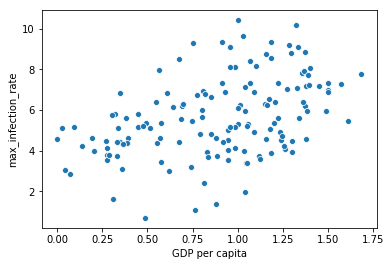

In [47]:
x = data["GDP per capita"]
y = data["max_infection_rate"]
sns.scatterplot(x, np.log(y))

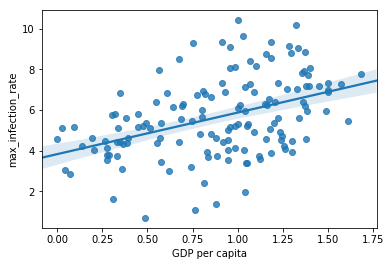

In [48]:
sns.regplot(x,np.log(y))

### Task 5.2: Plotting Social support vs maximum Infection rate

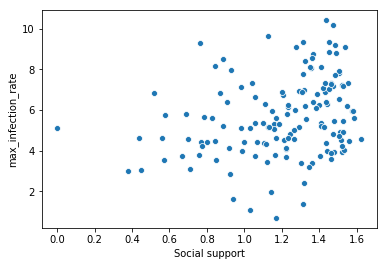

In [49]:
x = data["Social support"]
y = data["max_infection_rate"]
sns.scatterplot(x, np.log(y))

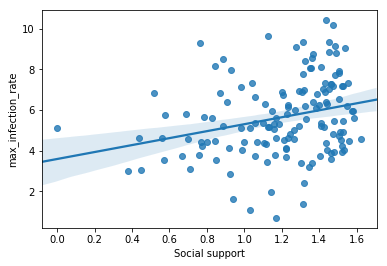

In [50]:
sns.regplot(x,np.log(y))

### Task 5.3: Plotting Healthy life expectancy vs maximum Infection rate

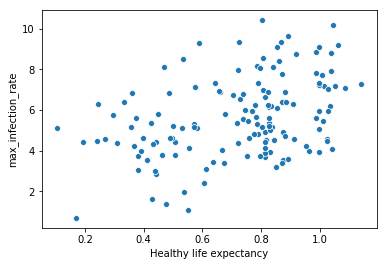

In [51]:
x = data["Healthy life expectancy"]
y = data["max_infection_rate"]
sns.scatterplot(x, np.log(y))

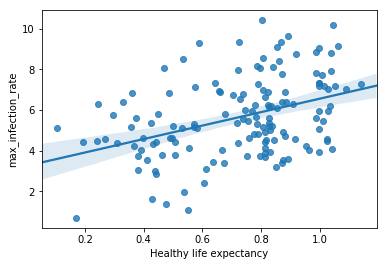

In [52]:
sns.regplot(x,np.log(y))

### Task 5.4: Plotting Freedom to make life choices vs maximum Infection rate

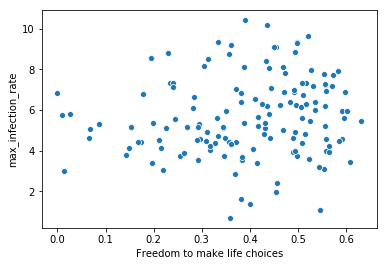

In [53]:
x = data["Freedom to make life choices"]
y = data["max_infection_rate"]
sns.scatterplot(x, np.log(y))

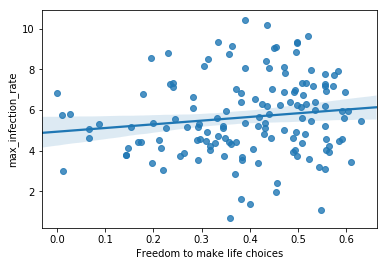

In [54]:
sns.regplot(x,np.log(y))